In [1]:
pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.3 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 28.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 8.3 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import math
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta
from numpy import random
from scipy.stats import norm
import nest_asyncio
import arviz as az
from numpy.core.shape_base import vstack

In [ ]:
sns.set_style("whitegrid")  # Set the style directly using seaborn
#sns.set(font="Times New Roman")  # Set the font using seaborn

plt.rc('axes', labelsize=16)
plt.rc('axes', titlesize=16)
plt.rc('figure', titlesize=20)

In [ ]:
np.random.seed(101)
#pi=math.pi
pi=3.141592653589794
ActualRunTime = 8256*3600
Runtime = 1000
N_L = 500
N_T = 500
N = 100
d = 100
num_PionDet = 28
num_MainDet = 84

In [ ]:
#Rates values from simulations at
#/home/elhamm/projects/def-wdconinc/elhamm/PionDetectorOptimization/simulation/run/remoll-Updated-July2023/Moller_Asymmetry/MainDet
#/home/elhamm/projects/def-wdconinc/elhamm/PionDetectorOptimization/simulation/run/remoll-Updated-July2023/Pion_Asymmetry/PionDet

I_Pion = 65  # Current (Micro-A [GHz])
#Rate_Mollers_PionDet = 3.5428*1e6
Rate_Mollers_PionDet = 8.54726*1e9
#Rate_Pions_PionDet = 1.71955*1e5
Rate_Pions_PionDet = 9.22396*1e10
Rates_PionDet = Rate_Pions_PionDet + Rate_Mollers_PionDet
Total_Rates_PionDet = (Rates_PionDet/(50*85*28))*65
Uncertainty_total_PionDet= (1/np.sqrt(Total_Rates_PionDet*Runtime))*1e9
Uncertainty_L_PionDet = (1/np.sqrt(Total_Rates_PionDet*Runtime*0.9))*1e9
Uncertainty_T_PionDet = (1/np.sqrt(Total_Rates_PionDet*Runtime*0.1))*1e9

#Rate_Mollers_MainDet = 2.77266*1e8
Rate_Mollers_MainDet = 1.3573441*1e14
#Rate_Pions_MainDet = 2.27860*1e6
Rate_Pions_MainDet =1.1465975*1e11
Rates_MainDet = Rate_Pions_MainDet + Rate_Mollers_MainDet
Total_Rates_MainDet = (Rates_MainDet/(50*84))
Uncertainty_total_MainDet= (1/np.sqrt(Total_Rates_MainDet*Runtime))*1e9
Uncertainty_L_MainDet = (1/np.sqrt(Total_Rates_MainDet*Runtime*0.9))*1e9
Uncertainty_T_MainDet = (1/np.sqrt(Total_Rates_MainDet*Runtime*0.1))*1e9

print(Total_Rates_PionDet, Total_Rates_MainDet, Uncertainty_L_PionDet, Uncertainty_L_MainDet, Uncertainty_T_PionDet, Uncertainty_T_MainDet, Uncertainty_total_PionDet, Uncertainty_total_MainDet)


55051646.2184874 32345016607.142857 4492.556939445852 185.34251678337282 13477.670818337554 556.0275503501185 4262.013733993213 175.83135009103287


In [ ]:
Pion_Asy_L_PionDet = pd.read_csv('Pion_Asymmetry_Longitudinal_PionDet.csv')
Pion_Asy_TV_PionDet = pd.read_csv('Pion_Asymmetry_Transverse_Vertical_PionDet.csv')
Pion_Asy_TH_PionDet = pd.read_csv('Pion_Asymmetry_Transverse_Horizontal_PionDet.csv')

Moller_Asy_L_PionDet = pd.read_csv('Moller_Asymmetry_Longitudinal_PionDet.csv')
Moller_Asy_TV_PionDet = pd.read_csv('Moller_Asymmetry-transverse-vertical-PionDet.csv')
Moller_Asy_TH_PionDet = pd.read_csv('Moller_Asymmetry-transverse-horizontal-PionDet.csv')

Dilution_Factor_PionDet = pd.read_csv('Dilution Factor_PionDet.csv')

Pion_Asy_L_MainDet = pd.read_csv('Pion_Asymmetry-longitudinal-MainDet-Ring5.csv')
Pion_Asy_TV_MainDet = pd.read_csv('Pion_Asymmetry-transverse-vertical-MainDet-Ring5.csv')
Pion_Asy_TH_MainDet = pd.read_csv('Pion_Asymmetry-transverse-horizontal-MainDet-Ring5.csv')

Moller_Asy_L_MainDet = pd.read_csv('Moller_Asymmetry-longitudinal-MainDet-Ring5.csv')
Moller_Asy_TV_MainDet = pd.read_csv('Moller_Asymmetry-transverse-vertical-MainDet-Ring5.csv')
Moller_Asy_TH_MainDet = pd.read_csv('Moller_Asymmetry-transverse-horizontal-MainDet-Ring5.csv')

Dilution_Factor_MainDet = pd.read_csv('Dilution Factor_MainDet.csv')


Measured_Asymmetry_PionDet_i_L = pd.read_csv('Measured_Asymmetry_PionDet_L.csv')
Measured_Asymmetry_MainDet_i_L = pd.read_csv('Measured_Asymmetry_MainDet_L.csv')
Measured_Asymmetry_PionDet_i_T = pd.read_csv('Measured_Asymmetry_PionDet_T.csv')
Measured_Asymmetry_MainDet_i_T = pd.read_csv('Measured_Asymmetry_MainDet_T.csv')


Measured_Dilution_Factor_pi_PionDet = np.array(Dilution_Factor_PionDet.Ratio)
Measured_Dilution_Factor_pi_PionDet_Uncertainty = np.array(Dilution_Factor_PionDet.Ratio_Uncertainty)

Measured_Dilution_Factor_pi_MainDet = np.array(Dilution_Factor_MainDet.Ratio)
Measured_Dilution_Factor_pi_MainDet_Uncertainty = np.array(Dilution_Factor_MainDet.Ratio_Uncertainty)

Normalized_Moller_Asy_TV_PionDet = pd.read_csv('Normalized_Moller_Asymmetry-transverse-vertical-PionDet.csv')
Normalized_Moller_Asy_TH_PionDet = pd.read_csv('Normalized_Moller_Asymmetry-transverse-horizontal-PionDet.csv')
Normalized_Pion_Asy_TV_PionDet = pd.read_csv('Normalized_Pion_Asymmetry_Transverse_Vertical_PionDet.csv')
Normalized_Pion_Asy_TH_PionDet = pd.read_csv('Normalized_Pion_Asymmetry_Transverse_Horizontal_PionDet.csv')

Normalized_Moller_Asy_TV_MainDet = pd.read_csv('Normalized_Moller_Asymmetry-transverse-vertical-MainDet-Ring5.csv')
Normalized_Moller_Asy_TH_MainDet = pd.read_csv('Normalized_Moller_Asymmetry-transverse-horizontal-MainDet-Ring5.csv')
Normalized_Pion_Asy_TV_MainDet = pd.read_csv('Normalized_Pion_Asymmetry-transverse-vertical-MainDet-Ring5.csv')
Normalized_Pion_Asy_TH_MainDet = pd.read_csv('Normalized_Pion_Asymmetry-transverse-horizontal-MainDet-Ring5.csv')


# Convert columns to numpy arrays
Data_A_eT_V_PionDet = Normalized_Moller_Asy_TV_PionDet.Normalized_Moller_Asymmetry
Data_A_eT_H_PionDet = Normalized_Moller_Asy_TH_PionDet.Normalized_Moller_Asymmetry
Data_A_piT_V_PionDet = Normalized_Pion_Asy_TV_PionDet.Normalized_Pion_Asymmetry
Data_A_piT_H_PionDet = Normalized_Pion_Asy_TH_PionDet.Normalized_Pion_Asymmetry

Data_A_eT_V_MainDet = Normalized_Moller_Asy_TV_MainDet.Normalized_Moller_Asymmetry
Data_A_eT_H_MainDet = Normalized_Moller_Asy_TH_MainDet.Normalized_Moller_Asymmetry
Data_A_piT_V_MainDet = Normalized_Pion_Asy_TV_MainDet.Normalized_Pion_Asymmetry
Data_A_piT_H_MainDet = Normalized_Pion_Asy_TH_MainDet.Normalized_Pion_Asymmetry
#print(Measured_Asymmetry, Measured_Asymmetry.shape)

In [ ]:
#DetNo = list(range(1, 86))
#DetNo = list(range(1, 29))

#plt.figure(figsize=(16,6))

#plt.plot(DetNo, Data_A_eT_V_MainDet, 'o-')
#plt.xlabel('DetNo')
#plt.grid(True)
#plt.show()

In [ ]:
Measured_Asymmetry_PionDet_L = []
dMeasured_Asymmetry_PionDet_L = []
Measured_Asymmetry_PionDet_T = []
dMeasured_Asymmetry_PionDet_T = []

Measured_Asymmetry_MainDet_L = []
dMeasured_Asymmetry_MainDet_L = []
Measured_Asymmetry_MainDet_T = []
dMeasured_Asymmetry_MainDet_T = []

for i in range(28):
  Measured_Asymmetry_PionDet_L_value = np.random.normal(Measured_Asymmetry_PionDet_i_L.at[i, 'Asymmetry_PionDet'], Uncertainty_L_PionDet, N_L)
  Measured_Asymmetry_PionDet_L.append(Measured_Asymmetry_PionDet_L_value)
  dMeasured_Asymmetry_PionDet_L.append(np.array([Uncertainty_L_PionDet]*N_L))

  Measured_Asymmetry_PionDet_T_value = np.random.normal(Measured_Asymmetry_PionDet_i_T.at[i, 'Asymmetry_PionDet'], Uncertainty_T_PionDet, N_T)
  Measured_Asymmetry_PionDet_T.append(Measured_Asymmetry_PionDet_T_value)
  dMeasured_Asymmetry_PionDet_T.append(np.array([Uncertainty_T_PionDet]*N_T))

for i in range(84):
  Measured_Asymmetry_MainDet_L_value = np.random.normal(Measured_Asymmetry_MainDet_i_L.at[i, 'Asymmetry_MainDet'], Uncertainty_L_MainDet, N_L)
  Measured_Asymmetry_MainDet_L.append(Measured_Asymmetry_MainDet_L_value)
  dMeasured_Asymmetry_MainDet_L.append(np.array([Uncertainty_L_MainDet]*N_L))

  Measured_Asymmetry_MainDet_T_value = np.random.normal(Measured_Asymmetry_MainDet_i_T.at[i, 'Asymmetry_MainDet'], Uncertainty_T_MainDet, N_T)
  Measured_Asymmetry_MainDet_T.append(Measured_Asymmetry_MainDet_T_value)
  dMeasured_Asymmetry_MainDet_T.append(np.array([Uncertainty_T_MainDet]*N_T))


print (np.shape(Measured_Asymmetry_PionDet_L), np.shape(dMeasured_Asymmetry_PionDet_T), np.shape(Measured_Asymmetry_MainDet_L), np.shape(dMeasured_Asymmetry_MainDet_T))
#print (np.shape(dMeasured_Asymmetry_PionDet_L), dMeasured_Asymmetry_PionDet_L)

(28, 500) (28, 500) (84, 500) (84, 500)


In [ ]:
f_Pi_PionDet_L = []
f_Pi_MainDet_L = []

f_Pi_PionDet_T = []
f_Pi_MainDet_T = []

for i in range(28):
  f_Pi_PionDet_L_value = np.random.normal(Dilution_Factor_PionDet.at[i, 'Ratio'], Dilution_Factor_PionDet.at[i, 'Ratio_Uncertainty'], N_L)
  f_Pi_PionDet_L.append(f_Pi_PionDet_L_value)

  f_Pi_PionDet_T_value = np.random.normal(Dilution_Factor_PionDet.at[i, 'Ratio'], Dilution_Factor_PionDet.at[i, 'Ratio_Uncertainty'], N_T)
  f_Pi_PionDet_T.append(f_Pi_PionDet_T_value)

for i in range(84):
  f_Pi_MainDet_L_value = np.random.normal(Dilution_Factor_MainDet.at[i, 'Ratio'], Dilution_Factor_MainDet.at[i, 'Ratio_Uncertainty'], N_L)
  f_Pi_MainDet_L.append(f_Pi_MainDet_L_value)

  f_Pi_MainDet_T_value = np.random.normal(Dilution_Factor_MainDet.at[i, 'Ratio'], Dilution_Factor_MainDet.at[i, 'Ratio_Uncertainty'], N_T)
  f_Pi_MainDet_T.append(f_Pi_MainDet_T_value)

f_Pi_PionDet_L = np.array(f_Pi_PionDet_L)
f_Pi_PionDet_T = np.array(f_Pi_PionDet_T)
f_Pi_MainDet_L = np.array(f_Pi_MainDet_L)
f_Pi_MainDet_T = np.array(f_Pi_MainDet_T)


print(f_Pi_PionDet_L.shape, f_Pi_PionDet_T.shape, f_Pi_MainDet_L.shape, f_Pi_MainDet_T.shape)

(28, 500) (28, 500) (84, 500) (84, 500)


In [ ]:
A_eT_V_L_PionDet = [None]*28
A_eT_H_L_PionDet = [None]*28
A_piT_V_L_PionDet = [None]*28
A_piT_H_L_PionDet = [None]*28

A_eT_V_L_MainDet = [None]*84
A_eT_H_L_MainDet = [None]*84
A_piT_V_L_MainDet = [None]*84
A_piT_H_L_MainDet = [None]*84

A_eT_V_T_PionDet = [None]*28
A_eT_H_T_PionDet = [None]*28
A_piT_V_T_PionDet = [None]*28
A_piT_H_T_PionDet = [None]*28

A_eT_V_T_MainDet = [None]*84
A_eT_H_T_MainDet = [None]*84
A_piT_V_T_MainDet = [None]*84
A_piT_H_T_MainDet = [None]*84


for i in range(0, 28):
    A_eT_V_L_PionDet[i] = np.array([Data_A_eT_V_PionDet[i]]*N_L)
    A_eT_H_L_PionDet[i] = np.array([Data_A_eT_H_PionDet[i]]*N_L)
    A_piT_V_L_PionDet[i] = np.array([Data_A_piT_V_PionDet[i]]*N_L)
    A_piT_H_L_PionDet[i] = np.array([Data_A_piT_H_PionDet[i]]*N_L)

    A_eT_V_T_PionDet[i] = np.array([Data_A_eT_V_PionDet[i]]*N_T)
    A_eT_H_T_PionDet[i] = np.array([Data_A_eT_H_PionDet[i]]*N_T)
    A_piT_V_T_PionDet[i] = np.array([Data_A_piT_V_PionDet[i]]*N_T)
    A_piT_H_T_PionDet[i] = np.array([Data_A_piT_H_PionDet[i]]*N_T)

for i in range(0, 84):
    A_eT_V_L_MainDet[i] = np.array([Data_A_eT_V_MainDet[i]]*N_L)
    A_eT_H_L_MainDet[i] = np.array([Data_A_eT_H_MainDet[i]]*N_L)
    A_piT_V_L_MainDet[i] = np.array([Data_A_piT_V_MainDet[i]]*N_L)
    A_piT_H_L_MainDet[i] = np.array([Data_A_piT_H_MainDet[i]]*N_L)

    A_eT_V_T_MainDet[i] = np.array([Data_A_eT_V_MainDet[i]]*N_T)
    A_eT_H_T_MainDet[i] = np.array([Data_A_eT_H_MainDet[i]]*N_T)
    A_piT_V_T_MainDet[i] = np.array([Data_A_piT_V_MainDet[i]]*N_T)
    A_piT_H_T_MainDet[i] = np.array([Data_A_piT_H_MainDet[i]]*N_T)

A_eT_V_L_PionDet = np.array(A_eT_V_L_PionDet)
A_eT_H_L_PionDet = np.array(A_eT_H_L_PionDet)
A_piT_V_L_PionDet = np.array(A_piT_V_L_PionDet)
A_piT_H_L_PionDet = np.array(A_piT_H_L_PionDet)

A_eT_V_T_PionDet = np.array(A_eT_V_T_PionDet)
A_eT_H_T_PionDet = np.array(A_eT_H_T_PionDet)
A_piT_V_T_PionDet = np.array(A_piT_V_T_PionDet)
A_piT_H_T_PionDet = np.array(A_piT_H_T_PionDet)

A_eT_V_L_MainDet = np.array(A_eT_V_L_MainDet)
A_eT_H_L_MainDet = np.array(A_eT_H_L_MainDet)
A_piT_V_L_MainDet = np.array(A_piT_V_L_MainDet)
A_piT_H_L_MainDet = np.array(A_piT_H_L_MainDet)

A_eT_V_T_MainDet = np.array(A_eT_V_T_MainDet)
A_eT_H_T_MainDet = np.array(A_eT_H_T_MainDet)
A_piT_V_T_MainDet = np.array(A_piT_V_T_MainDet)
A_piT_H_T_MainDet = np.array(A_piT_H_T_MainDet)

print(np.shape(A_eT_V_L_PionDet), np.shape(A_eT_H_T_PionDet), np.shape(A_piT_V_L_PionDet), np.shape(A_piT_H_T_PionDet))
#print(A_eT_V_i_PionDet, A_eT_V_PionDet)
print(np.shape(A_eT_V_L_MainDet), np.shape(A_eT_H_T_MainDet), np.shape(A_piT_V_L_MainDet), np.shape(A_piT_H_T_MainDet))
#print(A_eT_V_i_MainDet, A_eT_V_MainDet)

(28, 500) (28, 500) (28, 500) (28, 500)
(84, 500) (84, 500) (84, 500) (84, 500)


In [ ]:
theta_L_PionDet = np.zeros((num_PionDet, N_L))
theta_L_MainDet = np.zeros((num_MainDet, N_L))

phi_L_PionDet = np.zeros((num_PionDet, N_L))
phi_L_MainDet = np.zeros((num_MainDet, N_L))


for iteration in range(N_L):
    theta_L = np.random.normal(0, .0040)

    phi_L = np.random.normal(0, pi)

    theta_L_PionDet_i = np.array([theta_L] * num_PionDet)
    theta_L_MainDet_i = np.array([theta_L] * num_MainDet)

    phi_L_PionDet_i = np.array([phi_L] * num_PionDet)
    phi_L_MainDet_i = np.array([phi_L] * num_MainDet)


    for i in range(num_PionDet):
        theta_L_PionDet[i, iteration] = theta_L_PionDet_i[i]
        phi_L_PionDet[i, iteration] = phi_L_PionDet_i[i]

    for i in range(num_MainDet):
        theta_L_MainDet[i, iteration] = theta_L_MainDet_i[i]
        phi_L_MainDet[i, iteration] = phi_L_MainDet_i[i]

print(phi_L_PionDet.shape, theta_L_PionDet.shape)
print(phi_L_MainDet.shape, theta_L_MainDet.shape)
#print(theta_L_PionDet)
print(theta_L_PionDet[:,2])

(28, 500) (28, 500)
(84, 500) (84, 500)
[0.00247128 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128
 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128
 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128
 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128 0.00247128
 0.00247128 0.00247128 0.00247128 0.00247128]


In [ ]:
theta_T_PionDet = np.zeros((num_PionDet, N_T))
theta_T_MainDet = np.zeros((num_MainDet, N_T))

phi_T_PionDet = np.zeros((num_PionDet, N_T))
phi_T_MainDet = np.zeros((num_MainDet, N_T))

for iteration in range(N_T):
    theta_T = np.random.normal(pi/2, .0040)
    phi_T = np.random.normal(0, pi)

    theta_T_PionDet_i = np.array([theta_T] * num_PionDet)
    theta_T_MainDet_i = np.array([theta_T] * num_MainDet)

    phi_T_PionDet_i = np.array([phi_T] * num_PionDet)
    phi_T_MainDet_i = np.array([phi_T] * num_MainDet)

    for i in range(num_PionDet):
        theta_T_PionDet[i, iteration] = theta_T_PionDet_i[i]
        phi_T_PionDet[i, iteration] = phi_T_PionDet_i[i]

    for i in range(num_MainDet):
        theta_T_MainDet[i, iteration] = theta_T_MainDet_i[i]
        phi_T_MainDet[i, iteration] = phi_T_MainDet_i[i]

print(phi_T_PionDet.shape, theta_T_PionDet.shape)
print(phi_T_MainDet.shape, theta_T_MainDet.shape)
print(theta_T_PionDet[:,2], theta_T_MainDet[:,2])

(28, 500) (28, 500)
(84, 500) (84, 500)
[1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156] [1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156 1.57636156
 1.57636156 1.57636156 1.57636156 1.5763615

In [ ]:
asymmetry_code = """
data {
    int<lower=0> num_PionDet;
    int<lower=0> num_MainDet;
    int<lower=0> N_L;
    int<lower=0> N_T;
    matrix[num_PionDet, N_L] f_Pi_PionDet_L;
    matrix[num_MainDet, N_L] f_Pi_MainDet_L;
    matrix[num_PionDet, N_L] A_eT_V_L_PionDet;
    matrix[num_PionDet, N_L] A_eT_H_L_PionDet;
    matrix[num_PionDet, N_L] A_piT_V_L_PionDet;
    matrix[num_PionDet, N_L] A_piT_H_L_PionDet;
    matrix[num_MainDet, N_L] A_eT_V_L_MainDet;
    matrix[num_MainDet, N_L] A_eT_H_L_MainDet;
    matrix[num_MainDet, N_L] A_piT_V_L_MainDet;
    matrix[num_MainDet, N_L] A_piT_H_L_MainDet;
    matrix[num_PionDet, N_L] Measured_Asymmetry_PionDet_L;
    matrix[num_PionDet, N_L] dMeasured_Asymmetry_PionDet_L;
    matrix[num_MainDet, N_L] Measured_Asymmetry_MainDet_L;
    matrix[num_MainDet, N_L] dMeasured_Asymmetry_MainDet_L;
    matrix[num_PionDet, N_L] theta_L_PionDet;
    matrix[num_PionDet, N_L] phi_L_PionDet;
    matrix[num_MainDet, N_L] theta_L_MainDet;
    matrix[num_MainDet, N_L] phi_L_MainDet;
    matrix[num_PionDet, N_T] f_Pi_PionDet_T;
    matrix[num_MainDet, N_T] f_Pi_MainDet_T;
    matrix[num_PionDet, N_T] A_eT_V_T_PionDet;
    matrix[num_PionDet, N_T] A_eT_H_T_PionDet;
    matrix[num_PionDet, N_T] A_piT_V_T_PionDet;
    matrix[num_PionDet, N_T] A_piT_H_T_PionDet;
    matrix[num_MainDet, N_T] A_eT_V_T_MainDet;
    matrix[num_MainDet, N_T] A_eT_H_T_MainDet;
    matrix[num_MainDet, N_T] A_piT_V_T_MainDet;
    matrix[num_MainDet, N_T] A_piT_H_T_MainDet;
    matrix[num_PionDet, N_T] Measured_Asymmetry_PionDet_T;
    matrix[num_PionDet, N_T] dMeasured_Asymmetry_PionDet_T;
    matrix[num_MainDet, N_T] Measured_Asymmetry_MainDet_T;
    matrix[num_MainDet, N_T] dMeasured_Asymmetry_MainDet_T;
    matrix[num_PionDet, N_T] theta_T_PionDet;
    matrix[num_PionDet, N_T] phi_T_PionDet;
    matrix[num_MainDet, N_T] theta_T_MainDet;
    matrix[num_MainDet, N_T] phi_T_MainDet;
}
parameters {
    real A_eL;
    real A_eT;
    real A_piL;
    real A_piT;
}

model {
    // Model for Pion detector
    for (i in 1:num_PionDet)
        for (j in 1:N_L)
            Measured_Asymmetry_PionDet_L[i, j] ~ normal((1 - f_Pi_PionDet_L[i, j]) * ((A_eL) * cos(theta_L_PionDet[i,j]) + A_eT * sin(theta_L_PionDet[i,j]) * (A_eT_V_L_PionDet[i,j]*sin(phi_L_PionDet[i,j])+A_eT_H_L_PionDet[i,j]*cos(phi_L_PionDet[i,j]))) + f_Pi_PionDet_L[i, j] * (A_piL * cos(theta_L_PionDet[i,j]) + A_piT * sin(theta_L_PionDet[i,j]) * (A_piT_V_L_PionDet[i,j]*sin(phi_L_PionDet[i,j])+A_piT_H_L_PionDet[i,j]*cos(phi_L_PionDet[i,j]))), dMeasured_Asymmetry_PionDet_L[i,j]);
    for (i in 1:num_PionDet)
        for (j in 1:N_T)
            Measured_Asymmetry_PionDet_T[i, j] ~ normal((1 - f_Pi_PionDet_T[i, j]) * ((A_eL) * cos(theta_T_PionDet[i,j]) + A_eT * sin(theta_T_PionDet[i,j]) * (A_eT_V_T_PionDet[i,j]*sin(phi_T_PionDet[i,j])+A_eT_H_T_PionDet[i,j]*cos(phi_T_PionDet[i,j]))) + f_Pi_PionDet_T[i, j] * (A_piL * cos(theta_T_PionDet[i,j]) + A_piT * sin(theta_T_PionDet[i,j]) * (A_piT_V_T_PionDet[i,j]*sin(phi_T_PionDet[i,j])+A_piT_H_T_PionDet[i,j]*cos(phi_T_PionDet[i,j]))), dMeasured_Asymmetry_PionDet_T[i,j]);


    // Model for Main detetcor
    for (i in 1:num_MainDet)
        for (j in 1:N_L)
            Measured_Asymmetry_MainDet_L[i, j] ~ normal((1 - f_Pi_MainDet_L[i, j]) * ((A_eL) * cos(theta_L_MainDet[i,j]) + A_eT * sin(theta_L_MainDet[i,j]) * (A_eT_V_L_MainDet[i,j]*sin(phi_L_MainDet[i,j])+A_eT_H_L_MainDet[i,j]*cos(phi_L_MainDet[i,j]))) + f_Pi_MainDet_L[i, j] * (A_piL * cos(theta_L_MainDet[i,j]) + A_piT * sin(theta_L_MainDet[i,j]) * (A_piT_V_L_MainDet[i,j]*sin(phi_L_MainDet[i,j])+A_piT_H_L_MainDet[i,j]*cos(phi_L_MainDet[i,j]))), dMeasured_Asymmetry_MainDet_L[i,j]);
    for (i in 1:num_MainDet)
        for (j in 1:N_T)
            Measured_Asymmetry_MainDet_T[i, j] ~ normal((1 - f_Pi_MainDet_T[i, j]) * ((A_eL) * cos(theta_T_MainDet[i,j]) + A_eT * sin(theta_T_MainDet[i,j]) * (A_eT_V_T_MainDet[i,j]*sin(phi_T_MainDet[i,j])+A_eT_H_T_MainDet[i,j]*cos(phi_T_MainDet[i,j]))) + f_Pi_MainDet_T[i, j] * (A_piL * cos(theta_T_MainDet[i,j]) + A_piT * sin(theta_T_MainDet[i,j]) * (A_piT_V_T_MainDet[i,j]*sin(phi_T_MainDet[i,j])+A_piT_H_T_MainDet[i,j]*cos(phi_T_MainDet[i,j]))), dMeasured_Asymmetry_MainDet_T[i,j]);
}
"""

In [ ]:
#Put our data in a dictionary
asym_data = {
             'num_PionDet': num_PionDet,
             'num_MainDet': num_MainDet,
             'N_L': N_L,
             'N_T': N_T,
             'f_Pi_PionDet_L':f_Pi_PionDet_L,
             'f_Pi_MainDet_L':f_Pi_MainDet_L,
             'f_Pi_PionDet_T':f_Pi_PionDet_T,
             'f_Pi_MainDet_T':f_Pi_MainDet_T,
             'Measured_Asymmetry_PionDet_L': Measured_Asymmetry_PionDet_L,
             'dMeasured_Asymmetry_PionDet_L': dMeasured_Asymmetry_PionDet_L,
             'Measured_Asymmetry_MainDet_L': Measured_Asymmetry_MainDet_L,
             'dMeasured_Asymmetry_MainDet_L': dMeasured_Asymmetry_MainDet_L,
             'Measured_Asymmetry_PionDet_T': Measured_Asymmetry_PionDet_T,
             'dMeasured_Asymmetry_PionDet_T': dMeasured_Asymmetry_PionDet_T,
             'Measured_Asymmetry_MainDet_T': Measured_Asymmetry_MainDet_T,
             'dMeasured_Asymmetry_MainDet_T': dMeasured_Asymmetry_MainDet_T,
             'A_eT_V_L_PionDet': A_eT_V_L_PionDet,
             'A_eT_H_L_PionDet': A_eT_H_L_PionDet,
             'A_piT_V_L_PionDet': A_piT_V_L_PionDet,
             'A_piT_H_L_PionDet': A_piT_H_L_PionDet,
             'A_eT_V_L_MainDet': A_eT_V_L_MainDet,
             'A_eT_H_L_MainDet': A_eT_H_L_MainDet,
             'A_piT_V_L_MainDet': A_piT_V_L_MainDet,
             'A_piT_H_L_MainDet': A_piT_H_L_MainDet,
             'A_eT_V_T_PionDet': A_eT_V_T_PionDet,
             'A_eT_H_T_PionDet': A_eT_H_T_PionDet,
             'A_piT_V_T_PionDet': A_piT_V_T_PionDet,
             'A_piT_H_T_PionDet': A_piT_H_T_PionDet,
             'A_eT_V_T_MainDet': A_eT_V_T_MainDet,
             'A_eT_H_T_MainDet': A_eT_H_T_MainDet,
             'A_piT_V_T_MainDet': A_piT_V_T_MainDet,
             'A_piT_H_T_MainDet': A_piT_H_T_MainDet,
             'theta_L_PionDet': theta_L_PionDet,
             'phi_L_PionDet': phi_L_PionDet,
             'theta_L_MainDet': theta_L_MainDet,
             'phi_L_MainDet': phi_L_MainDet,
             'theta_T_PionDet': theta_T_PionDet,
             'phi_T_PionDet': phi_T_PionDet,
             'theta_T_MainDet': theta_T_MainDet,
             'phi_T_MainDet': phi_T_MainDet,
            }
#print(asym_data)

In [ ]:
# Compile the model
nest_asyncio.apply()
model = stan.build(program_code=asymmetry_code, data=asym_data)

Building...



Building: 67.0s, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.


In [ ]:
# Train the model and generate samples
asym_fit = model.sample(num_chains=1, num_samples=1000, num_warmup=500)

Sampling:   0%
Sampling:   0% (1/1500)
Sampling:   7% (100/1500)
Sampling:  13% (200/1500)
Sampling:  20% (300/1500)
Sampling:  27% (400/1500)
Sampling:  33% (500/1500)
Sampling:  33% (501/1500)
Sampling:  40% (600/1500)
Sampling:  47% (700/1500)
Sampling:  53% (800/1500)
Sampling:  60% (900/1500)
Sampling:  67% (1000/1500)
Sampling:  73% (1100/1500)
Sampling:  80% (1200/1500)
Sampling:  87% (1300/1500)
Sampling:  93% (1400/1500)
Sampling: 100% (1500/1500)
Sampling: 100% (1500/1500), done.
Messages received during sampling:
  Gradient evaluation took 0.181537 seconds
  1000 transitions using 10 leapfrog steps per transition would take 1815.37 seconds.
  Adjust your expectations accordingly!


In [ ]:
summary = asym_fit.to_frame().describe()
print(summary.T)

                count          mean           std           min           25%  \
parameters                                                                      
lp__           1000.0 -64214.021352  1.479427e+00 -64222.809975 -64214.721491   
accept_stat__  1000.0      0.907404  1.036178e-01      0.392526      0.862102   
stepsize__     1000.0      0.722137  2.221557e-16      0.722137      0.722137   
treedepth__    1000.0      2.397000  5.250397e-01      1.000000      2.000000   
n_leapfrog__   1000.0      5.130000  2.019698e+00      1.000000      3.000000   
divergent__    1000.0      0.000000  0.000000e+00      0.000000      0.000000   
energy__       1000.0  64216.013860  2.093125e+00  64212.484907  64214.475045   
A_eL           1000.0    -31.668844  8.833638e-01    -34.079549    -32.247948   
A_eT           1000.0     13.309001  5.099192e+00     -3.378769      9.744758   
A_piL          1000.0  18618.479184  6.933683e+01  18368.370357  18573.885709   
A_piT          1000.0    269

In [ ]:
A_eL = summary['A_eL'][1]
A_eT = summary['A_eT'][1]
A_piL = (summary['A_piL'][1])
A_piT = (summary['A_piT'][1])
print(A_eL, A_eT, A_piL, A_piT)

-31.668843531497444 13.30900089031579 18618.479184354903 269.7937771051289


In [ ]:
dA_eL = summary['A_eL'][2]
dA_eT = summary['A_eT'][2]
dA_piL = summary['A_piL'][2]
dA_piT = summary['A_piT'][2]
print(dA_eL, dA_eT, dA_piL, dA_piT)

0.8833638317395489 5.099191525269587 69.33682849866408 302.7244723198339


In [ ]:
Measured_Asymmetry_PionDet_L_Fitted = np.zeros((num_PionDet, N_L))
Measured_Asymmetry_MainDet_L_Fitted = np.zeros((num_MainDet, N_L))
Measured_Asymmetry_PionDet_T_Fitted = np.zeros((num_PionDet, N_T))
Measured_Asymmetry_MainDet_T_Fitted = np.zeros((num_MainDet, N_T))

# Model for Pion detector
for i in range(num_PionDet):
  for j in range(N_L):
    Measured_Asymmetry_PionDet_L_Fitted[i,j] = ((1 - f_Pi_PionDet_L[i, j]) * (A_eL * np.cos(theta_L_PionDet[i, j]) + A_eT * np.sin(theta_L_PionDet[i, j]) * (A_eT_V_L_PionDet[i, j] * np.sin(phi_L_PionDet[i, j]) + A_eT_H_L_PionDet[i, j] * np.cos(phi_L_PionDet[i, j]))) + f_Pi_PionDet_L[i, j] * (A_piL * np.cos(theta_L_PionDet[i, j]) + A_piT * np.sin(theta_L_PionDet[i, j]) * (A_piT_V_L_PionDet[i, j] * np.sin(phi_L_PionDet[i, j]) + A_piT_H_L_PionDet[i, j] * np.cos(phi_L_PionDet[i, j]))))

for i in range(num_PionDet):
  for j in range(N_T):
    Measured_Asymmetry_PionDet_T_Fitted[i,j] = ((1 - f_Pi_PionDet_T[i, j]) * (A_eL * np.cos(theta_T_PionDet[i, j]) + A_eT * np.sin(theta_T_PionDet[i, j]) * (A_eT_V_T_PionDet[i, j] * np.sin(phi_T_PionDet[i, j]) + A_eT_H_T_PionDet[i, j] * np.cos(phi_T_PionDet[i, j]))) + f_Pi_PionDet_T[i, j] * (A_piL * np.cos(theta_T_PionDet[i, j]) + A_piT * np.sin(theta_T_PionDet[i, j]) * (A_piT_V_T_PionDet[i, j] * np.sin(phi_T_PionDet[i, j]) + A_piT_H_T_PionDet[i, j] * np.cos(phi_T_PionDet[i, j]))))

# Model for Main detector
for i in range(num_MainDet):
  for j in range(N_L):
    Measured_Asymmetry_MainDet_L_Fitted[i,j] = ((1 - f_Pi_MainDet_L[i, j]) * (A_eL * np.cos(theta_L_MainDet[i, j]) + A_eT * np.sin(theta_L_MainDet[i, j]) * (A_eT_V_L_MainDet[i, j] * np.sin(phi_L_MainDet[i, j]) + A_eT_H_L_MainDet[i, j] * np.cos(phi_L_MainDet[i, j]))) + f_Pi_MainDet_L[i, j] * (A_piL * np.cos(theta_L_MainDet[i, j]) + A_piT * np.sin(theta_L_MainDet[i, j]) * (A_piT_V_L_MainDet[i, j] * np.sin(phi_L_MainDet[i, j]) + A_piT_H_L_MainDet[i, j] * np.cos(phi_L_MainDet[i, j]))))

for i in range(num_MainDet):
  for j in range(N_T):
    Measured_Asymmetry_MainDet_T_Fitted[i,j] = ((1 - f_Pi_MainDet_T[i, j]) * (A_eL * np.cos(theta_T_MainDet[i, j]) + A_eT * np.sin(theta_T_MainDet[i, j]) * (A_eT_V_T_MainDet[i, j] * np.sin(phi_T_MainDet[i, j]) + A_eT_H_T_MainDet[i, j] * np.cos(phi_T_MainDet[i, j]))) + f_Pi_MainDet_T[i, j] * (A_piL * np.cos(theta_T_MainDet[i, j]) + A_piT * np.sin(theta_T_MainDet[i, j]) * (A_piT_V_T_MainDet[i, j] * np.sin(phi_T_MainDet[i, j]) + A_piT_H_T_MainDet[i, j] * np.cos(phi_T_MainDet[i, j]))))

#print(Measured_Asymmetry_PionDet_L_Fitted, Measured_Asymmetry_MainDet_L_Fitted, Measured_Asymmetry_PionDet_L_Fitted.shape, Measured_Asymmetry_MainDet_L_Fitted.shape)

In [ ]:
#Comparing Measured_Asymmetry values (inputs of the code) with the fitted Measured_Asymmetry values
Measured_Asymmetry_PionDet_L_Fitted_mean = np.mean(Measured_Asymmetry_PionDet_L_Fitted, axis=1)
dA_Measured_Asymmetry_PionDet_L_Fitted_mean = np.std(Measured_Asymmetry_PionDet_L_Fitted, axis=1)

Measured_Asymmetry_MainDet_L_Fitted_mean = np.mean(Measured_Asymmetry_MainDet_L_Fitted, axis=1)
dA_Measured_Asymmetry_MainDet_L_Fitted_mean = np.std(Measured_Asymmetry_MainDet_L_Fitted, axis=1)

Measured_Asymmetry_PionDet_T_Fitted_mean = np.mean(Measured_Asymmetry_PionDet_T_Fitted, axis=1)
dA_Measured_Asymmetry_PionDet_T_Fitted_mean = np.std(Measured_Asymmetry_PionDet_T_Fitted, axis=1)

Measured_Asymmetry_MainDet_T_Fitted_mean = np.mean(Measured_Asymmetry_MainDet_T_Fitted, axis=1)
dA_Measured_Asymmetry_MainDet_T_Fitted_mean = np.std(Measured_Asymmetry_MainDet_T_Fitted, axis=1)


Measured_Asymmetry_PionDet_L_mean = np.mean(Measured_Asymmetry_PionDet_L, axis=1)
dA_Measured_Asymmetry_PionDet_L_mean = np.std(Measured_Asymmetry_PionDet_L, axis=1)

Measured_Asymmetry_MainDet_L_mean = np.mean(Measured_Asymmetry_MainDet_L, axis=1)
dA_Measured_Asymmetry_MainDet_L_mean = np.std(Measured_Asymmetry_MainDet_L, axis=1)

Measured_Asymmetry_PionDet_T_mean = np.mean(Measured_Asymmetry_PionDet_T, axis=1)
dA_Measured_Asymmetry_PionDet_T_mean = np.std(Measured_Asymmetry_PionDet_T, axis=1)

Measured_Asymmetry_MainDet_T_mean = np.mean(Measured_Asymmetry_MainDet_T, axis=1)
dA_Measured_Asymmetry_MainDet_T_mean = np.std(Measured_Asymmetry_MainDet_T, axis=1)

#print(Measured_Asymmetry_PionDet_L_Fitted_mean, dA_Measured_Asymmetry_PionDet_L_Fitted_mean, Measured_Asymmetry_PionDet_L_Fitted_mean.shape, dA_Measured_Asymmetry_PionDet_L_Fitted_mean.shape)
#print(Measured_Asymmetry_MainDet_L_Fitted_mean, dA_Measured_Asymmetry_MainDet_L_Fitted_mean, Measured_Asymmetry_MainDet_L_Fitted_mean.shape, dA_Measured_Asymmetry_MainDet_L_Fitted_mean.shape)

#print(Measured_Asymmetry_PionDet_T_Fitted_mean, dA_Measured_Asymmetry_PionDet_T_Fitted_mean, Measured_Asymmetry_PionDet_T_Fitted_mean.shape, dA_Measured_Asymmetry_PionDet_T_Fitted_mean.shape)
#print(Measured_Asymmetry_MainDet_T_Fitted_mean, dA_Measured_Asymmetry_MainDet_T_Fitted_mean, Measured_Asymmetry_MainDet_T_Fitted_mean.shape, dA_Measured_Asymmetry_MainDet_T_Fitted_mean.shape)


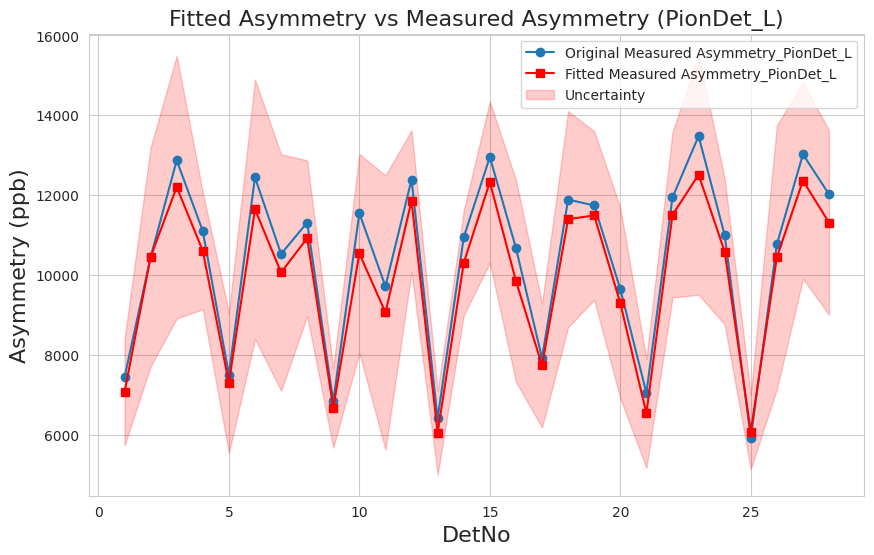

In [ ]:
DetNo = list(range(1, 29))

plt.figure(figsize=(10,6))

plt.plot(DetNo, Measured_Asymmetry_PionDet_L_mean, 'o-', label='Original Measured Asymmetry_PionDet_L')

plt.plot(DetNo, Measured_Asymmetry_PionDet_L_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_PionDet_L')

# Shading the uncertainty area
plt.fill_between(DetNo,
                 Measured_Asymmetry_PionDet_L_Fitted_mean - dA_Measured_Asymmetry_PionDet_L_Fitted_mean,
                 Measured_Asymmetry_PionDet_L_Fitted_mean + dA_Measured_Asymmetry_PionDet_L_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

plt.xlabel('DetNo')
plt.ylabel('Asymmetry (ppb)')
plt.title('Fitted Asymmetry vs Measured Asymmetry (PionDet_L)')
plt.legend()
plt.grid(True)
plt.show()

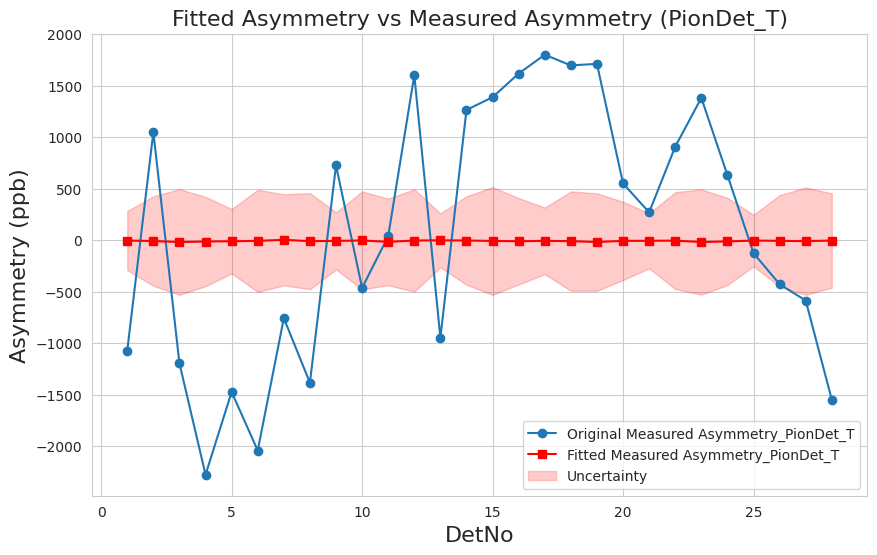

In [ ]:
DetNo = list(range(1, 29))

plt.figure(figsize=(10,6))

plt.plot(DetNo, Measured_Asymmetry_PionDet_T_mean, 'o-', label='Original Measured Asymmetry_PionDet_T')

plt.plot(DetNo, Measured_Asymmetry_PionDet_T_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_PionDet_T')

# Shading the uncertainty area
plt.fill_between(DetNo,
                 Measured_Asymmetry_PionDet_T_Fitted_mean - dA_Measured_Asymmetry_PionDet_T_Fitted_mean,
                 Measured_Asymmetry_PionDet_T_Fitted_mean + dA_Measured_Asymmetry_PionDet_T_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

plt.xlabel('DetNo')
plt.ylabel('Asymmetry (ppb)')
plt.title('Fitted Asymmetry vs Measured Asymmetry (PionDet_T)')
plt.legend()
plt.grid(True)
plt.show()

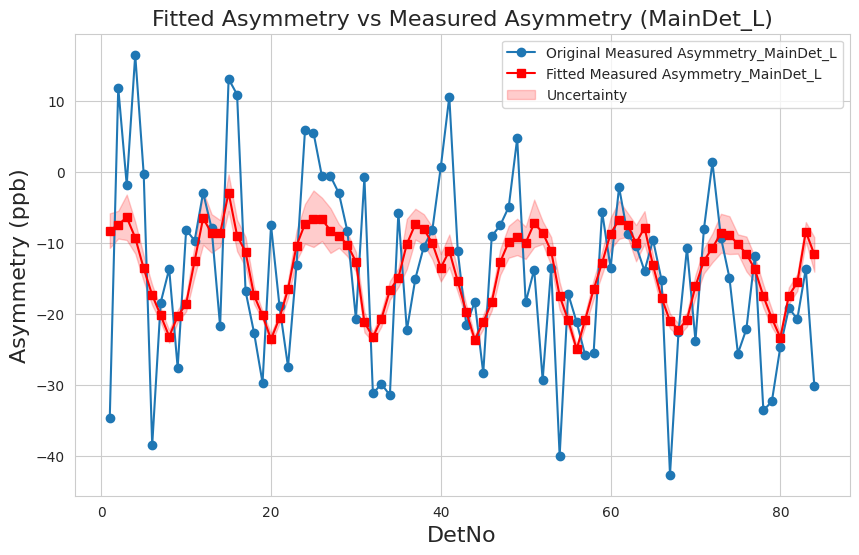

In [ ]:
DetNo = list(range(1, 85))

plt.figure(figsize=(10,6))

plt.plot(DetNo, Measured_Asymmetry_MainDet_L_mean, 'o-', label='Original Measured Asymmetry_MainDet_L')

plt.plot(DetNo, Measured_Asymmetry_MainDet_L_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_MainDet_L')

# Shading the uncertainty area
plt.fill_between(DetNo,
                 Measured_Asymmetry_MainDet_L_Fitted_mean - dA_Measured_Asymmetry_MainDet_L_Fitted_mean,
                 Measured_Asymmetry_MainDet_L_Fitted_mean + dA_Measured_Asymmetry_MainDet_L_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

plt.xlabel('DetNo')
plt.ylabel('Asymmetry (ppb)')
plt.title('Fitted Asymmetry vs Measured Asymmetry (MainDet_L)')
plt.legend()
plt.grid(True)
plt.show()

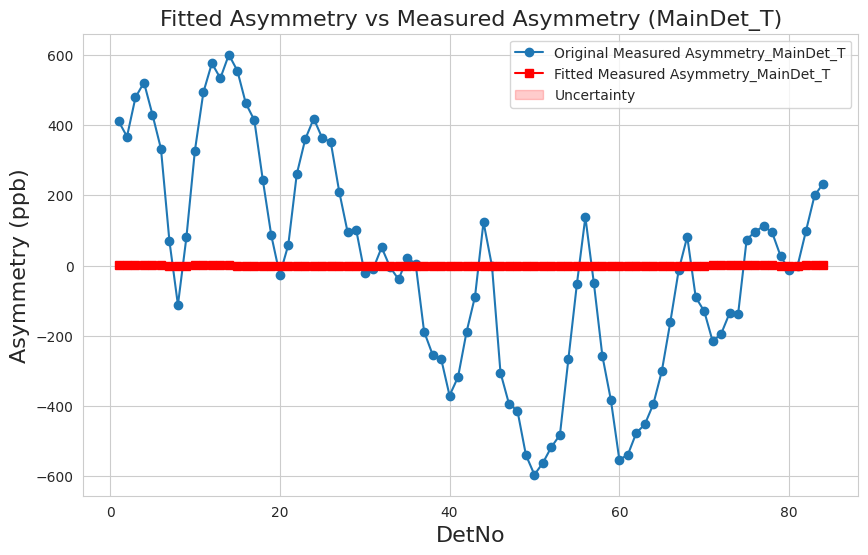

In [ ]:
DetNo = list(range(1, 85))

plt.figure(figsize=(10,6))

plt.plot(DetNo, Measured_Asymmetry_MainDet_T_mean, 'o-', label='Original Measured Asymmetry_MainDet_T')

plt.plot(DetNo, Measured_Asymmetry_MainDet_T_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_MainDet_T')

# Shading the uncertainty area
plt.fill_between(DetNo,
                 Measured_Asymmetry_MainDet_T_Fitted_mean - dA_Measured_Asymmetry_MainDet_T_Fitted_mean,
                 Measured_Asymmetry_MainDet_T_Fitted_mean + dA_Measured_Asymmetry_MainDet_T_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

plt.xlabel('DetNo')
plt.ylabel('Asymmetry (ppb)')
plt.title('Fitted Asymmetry vs Measured Asymmetry (MainDet_T)')
plt.legend()
plt.grid(True)
plt.show()

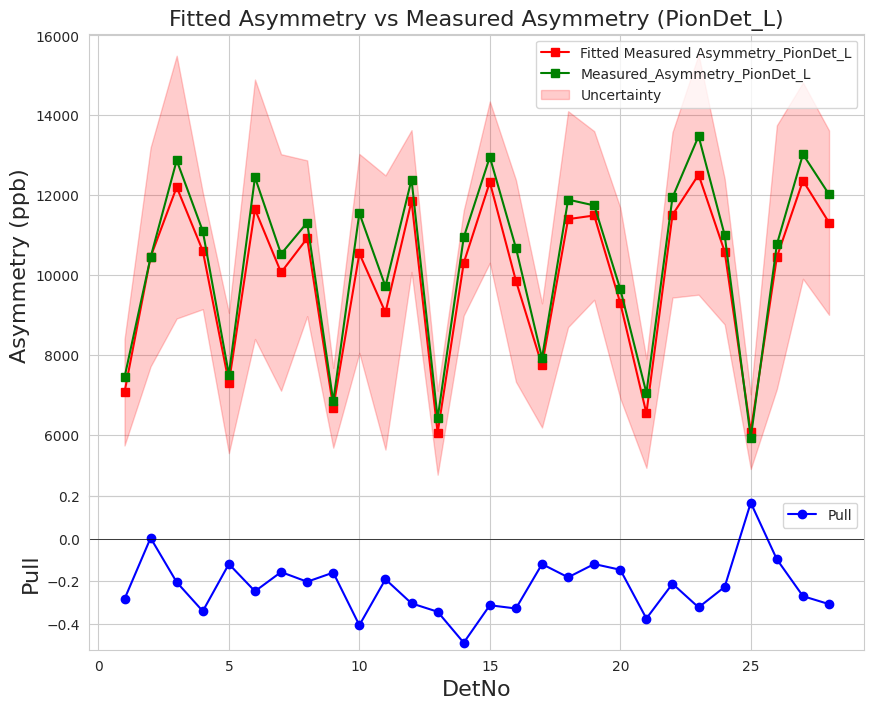

In [ ]:
DetNo = list(range(1, 29))

# Calculate the pull
pull_values = (Measured_Asymmetry_PionDet_L_Fitted_mean - Measured_Asymmetry_PionDet_L_mean) / dA_Measured_Asymmetry_PionDet_L_Fitted_mean

# Create a figure and a set of subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Main plot on ax1
ax1.plot(DetNo, Measured_Asymmetry_PionDet_L_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_PionDet_L')
ax1.plot(DetNo, Measured_Asymmetry_PionDet_L_mean, 's-', color='green', label='Measured_Asymmetry_PionDet_L')

# Shading the uncertainty area
ax1.fill_between(DetNo,
                 Measured_Asymmetry_PionDet_L_Fitted_mean - dA_Measured_Asymmetry_PionDet_L_Fitted_mean,
                 Measured_Asymmetry_PionDet_L_Fitted_mean + dA_Measured_Asymmetry_PionDet_L_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

ax1.set_ylabel('Asymmetry (ppb)')
ax1.set_title('Fitted Asymmetry vs Measured Asymmetry (PionDet_L)')
ax1.legend()
ax1.grid(True)

# Pull plot on ax2
ax2.plot(DetNo, pull_values, 'o-', color='blue', label='Pull')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_xlabel('DetNo')
ax2.set_ylabel('Pull')
ax2.grid(True)
ax2.legend()

# Show only x labels on the bottom plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)  # Adjust the space between the plots

plt.show()

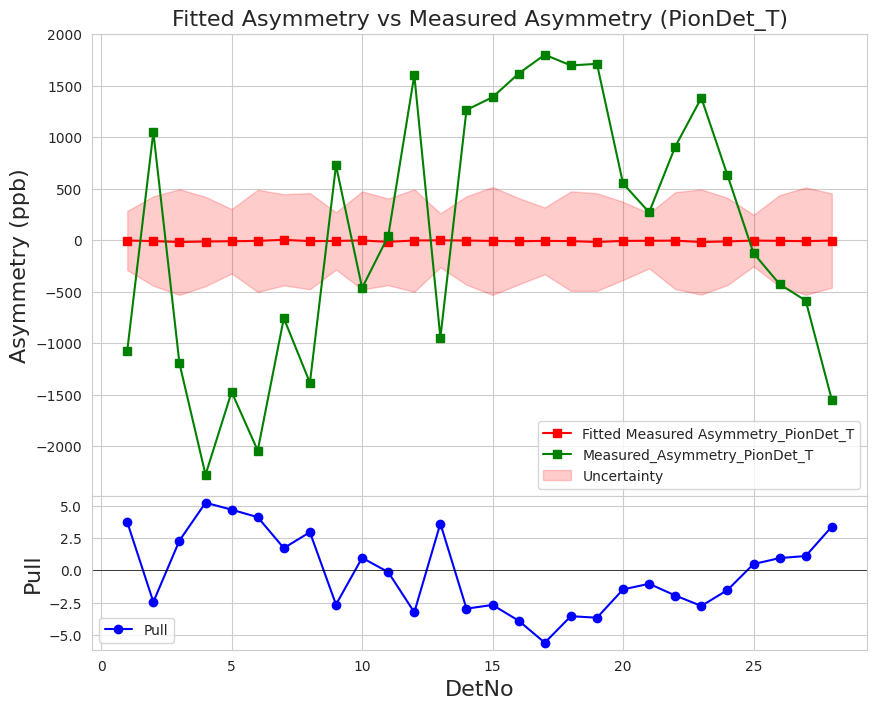

In [ ]:
DetNo = list(range(1, 29))

# Calculate the pull
pull_values = (Measured_Asymmetry_PionDet_T_Fitted_mean - Measured_Asymmetry_PionDet_T_mean) / dA_Measured_Asymmetry_PionDet_T_Fitted_mean

# Create a figure and a set of subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Main plot on ax1
ax1.plot(DetNo, Measured_Asymmetry_PionDet_T_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_PionDet_T')
ax1.plot(DetNo, Measured_Asymmetry_PionDet_T_mean, 's-', color='green', label='Measured_Asymmetry_PionDet_T')

# Shading the uncertainty area
ax1.fill_between(DetNo,
                 Measured_Asymmetry_PionDet_T_Fitted_mean - dA_Measured_Asymmetry_PionDet_T_Fitted_mean,
                 Measured_Asymmetry_PionDet_T_Fitted_mean + dA_Measured_Asymmetry_PionDet_T_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

ax1.set_ylabel('Asymmetry (ppb)')
ax1.set_title('Fitted Asymmetry vs Measured Asymmetry (PionDet_T)')
ax1.legend()
ax1.grid(True)

# Pull plot on ax2
ax2.plot(DetNo, pull_values, 'o-', color='blue', label='Pull')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_xlabel('DetNo')
ax2.set_ylabel('Pull')
ax2.grid(True)
ax2.legend()

# Show only x labels on the bottom plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)  # Adjust the space between the plots

plt.show()

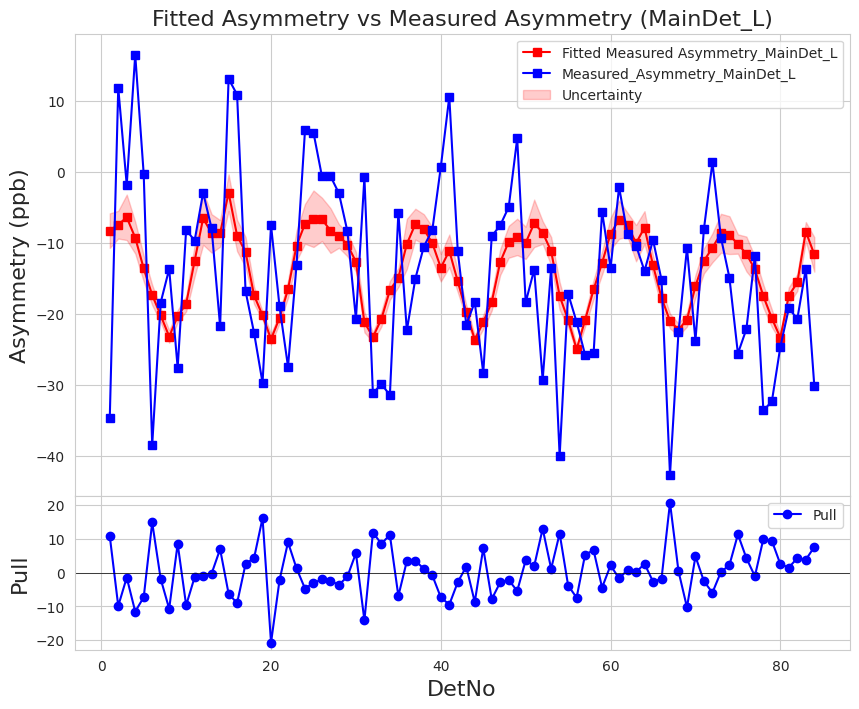

In [ ]:
DetNo = list(range(1, 85))

# Calculate the pull
pull_values = (Measured_Asymmetry_MainDet_L_Fitted_mean - Measured_Asymmetry_MainDet_L_mean) / dA_Measured_Asymmetry_MainDet_L_Fitted_mean

# Create a figure and a set of subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Main plot on ax1
ax1.plot(DetNo, Measured_Asymmetry_MainDet_L_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_MainDet_L')
ax1.plot(DetNo, Measured_Asymmetry_MainDet_L_mean, 's-', color='blue', label='Measured_Asymmetry_MainDet_L')

# Shading the uncertainty area
ax1.fill_between(DetNo,
                 Measured_Asymmetry_MainDet_L_Fitted_mean - dA_Measured_Asymmetry_MainDet_L_Fitted_mean,
                 Measured_Asymmetry_MainDet_L_Fitted_mean + dA_Measured_Asymmetry_MainDet_L_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

ax1.set_ylabel('Asymmetry (ppb)')
ax1.set_title('Fitted Asymmetry vs Measured Asymmetry (MainDet_L)')
ax1.legend()
ax1.grid(True)

# Pull plot on ax2
ax2.plot(DetNo, pull_values, 'o-', color='blue', label='Pull')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_xlabel('DetNo')
ax2.set_ylabel('Pull')
ax2.grid(True)
ax2.legend()

# Show only x labels on the bottom plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)  # Adjust the space between the plots

plt.show()

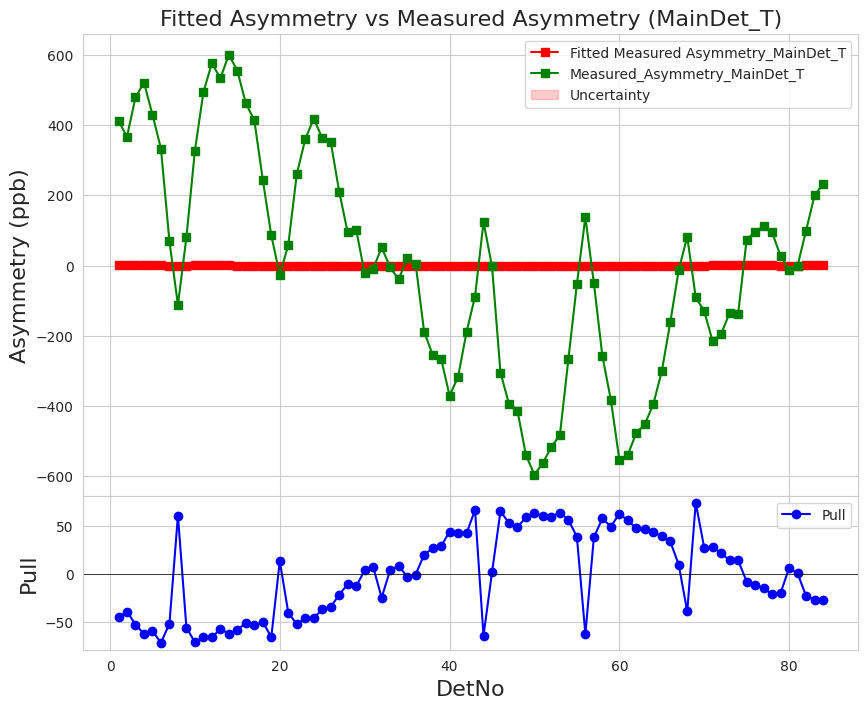

In [ ]:
DetNo = list(range(1, 85))

# Calculate the pull
pull_values = (Measured_Asymmetry_MainDet_T_Fitted_mean - Measured_Asymmetry_MainDet_T_mean) / dA_Measured_Asymmetry_MainDet_T_Fitted_mean

# Create a figure and a set of subplots with 2 rows and 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Main plot on ax1
ax1.plot(DetNo, Measured_Asymmetry_MainDet_T_Fitted_mean, 's-', color='red', label='Fitted Measured Asymmetry_MainDet_T')
ax1.plot(DetNo, Measured_Asymmetry_MainDet_T_mean, 's-', color='green', label='Measured_Asymmetry_MainDet_T')

# Shading the uncertainty area
ax1.fill_between(DetNo,
                 Measured_Asymmetry_MainDet_T_Fitted_mean - dA_Measured_Asymmetry_MainDet_T_Fitted_mean,
                 Measured_Asymmetry_MainDet_T_Fitted_mean + dA_Measured_Asymmetry_MainDet_T_Fitted_mean,
                 color='red', alpha=0.2, label='Uncertainty')

ax1.set_ylabel('Asymmetry (ppb)')
ax1.set_title('Fitted Asymmetry vs Measured Asymmetry (MainDet_T)')
ax1.legend()
ax1.grid(True)

# Pull plot on ax2
ax2.plot(DetNo, pull_values, 'o-', color='blue', label='Pull')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.set_xlabel('DetNo')
ax2.set_ylabel('Pull')
ax2.grid(True)
ax2.legend()

# Show only x labels on the bottom plot
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)  # Adjust the space between the plots

plt.show()



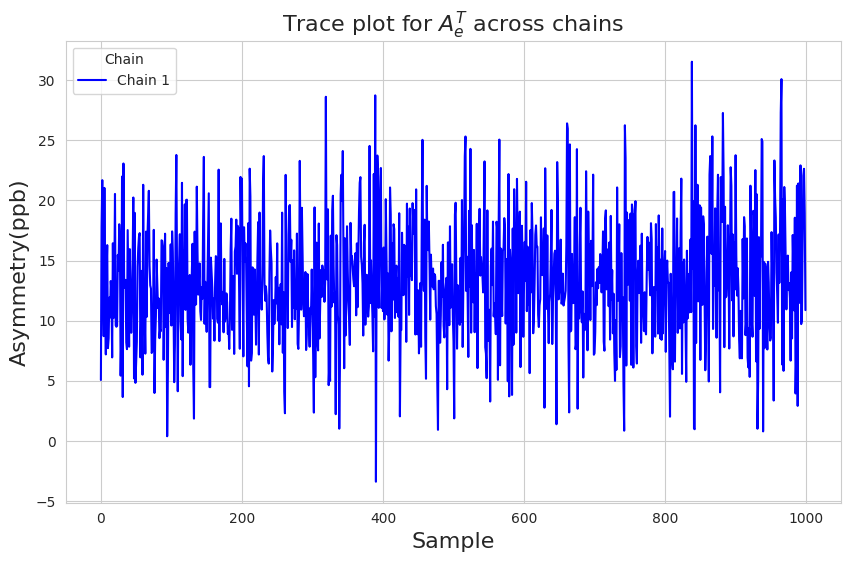

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each chain's trace for the 'A_eT' parameter
for chain in range(nchains):
    # Select the chain data for 'A_eT'
    chain_data = idata.posterior['A_eT'].sel(chain=chain).values.flatten()
    # Generate a trace plot
    plt.plot(chain_data, label=f'Chain {chain + 1}', color=colors[chain % len(colors)])

# Add legend and labels
plt.legend(title='Chain')
plt.xlabel('Sample')
plt.ylabel('Asymmetry(ppb)')
plt.title('Trace plot for $A^T_e$ across chains')

# Show the plot
plt.show()

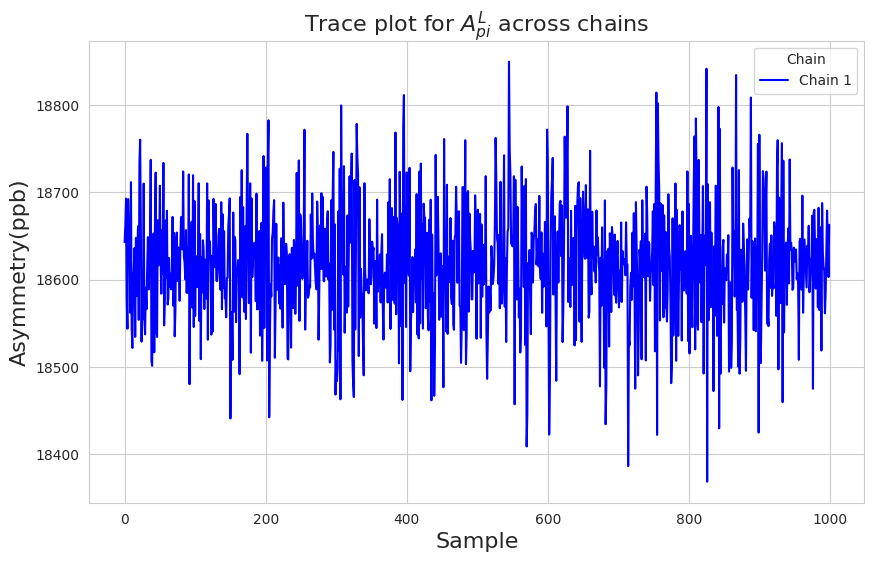

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each chain's trace for the 'A_piL' parameter
for chain in range(nchains):
    # Select the chain data for 'A_piL'
    chain_data = idata.posterior['A_piL'].sel(chain=chain).values.flatten()
    # Generate a trace plot
    plt.plot(chain_data, label=f'Chain {chain + 1}', color=colors[chain % len(colors)])

# Add legend and labels
plt.legend(title='Chain')
plt.xlabel('Sample')
plt.ylabel('Asymmetry(ppb)')
plt.title('Trace plot for $A^L_{pi}$ across chains')

# Show the plot
plt.show()

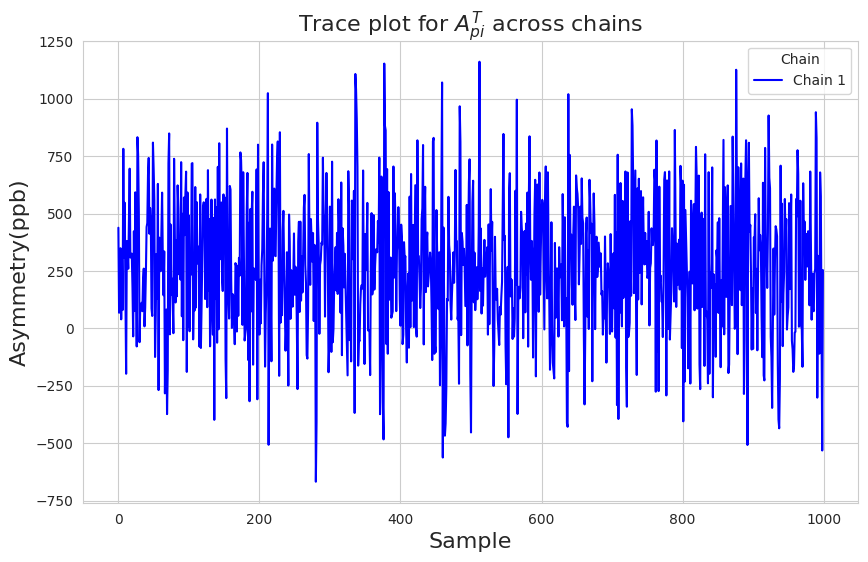

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each chain's trace for the 'A_piT' parameter
for chain in range(nchains):
    # Select the chain data for 'A_piT'
    chain_data = idata.posterior['A_piT'].sel(chain=chain).values.flatten()
    # Generate a trace plot
    plt.plot(chain_data, label=f'Chain {chain + 1}', color=colors[chain % len(colors)])

# Add legend and labels
plt.legend(title='Chain')
plt.xlabel('Sample')
plt.ylabel('Asymmetry(ppb)')
plt.title('Trace plot for $A^T_{pi}$ across chains')

# Show the plot
plt.show()

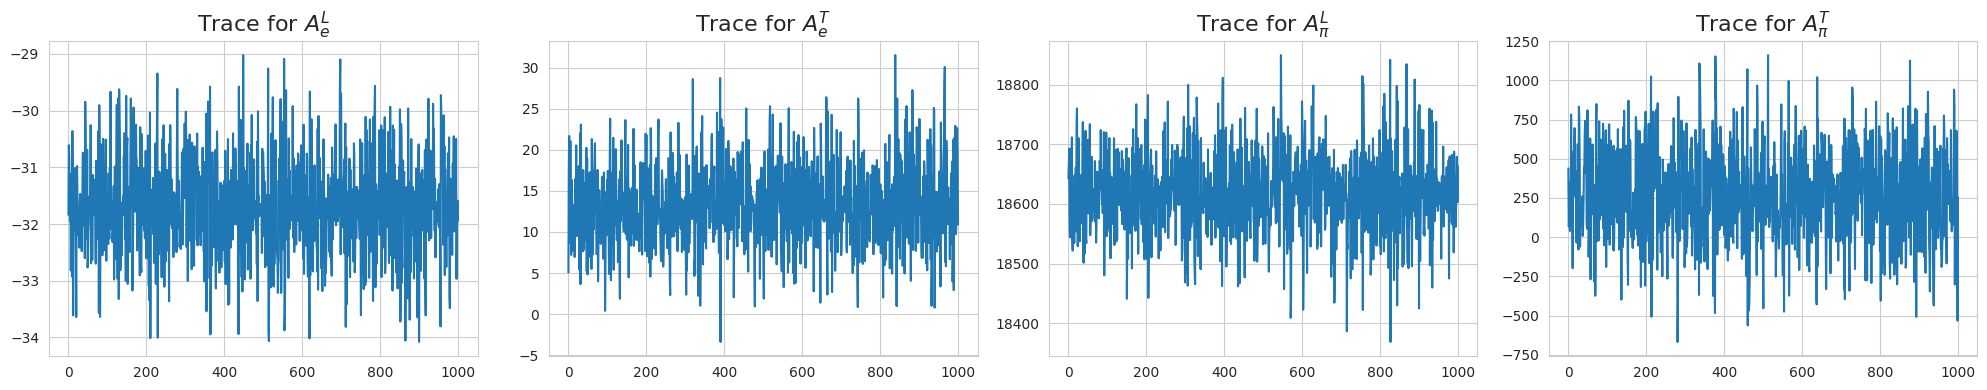

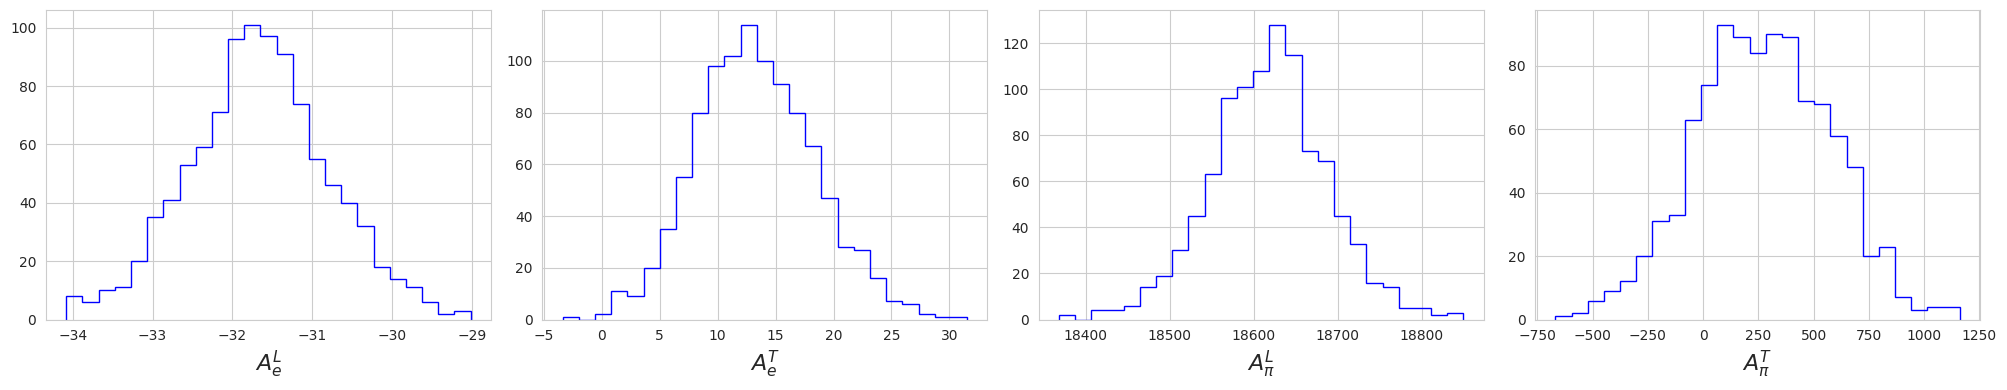

In [ ]:
trace = asym_fit.to_frame()

# Trace plots
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.plot(trace['A_eL'])
plt.title('Trace for $A^L_e$')

plt.subplot(1, 4, 2)
plt.plot(trace['A_eT'])
plt.title('Trace for $A^T_e$')

plt.subplot(1, 4, 3)
plt.plot(trace['A_piL'])
plt.title('Trace for $A^L_{\pi}$')

plt.subplot(1, 4, 4)
plt.plot(trace['A_piT'])
plt.title('Trace for $A^T_{\pi}$')

plt.tight_layout()
plt.show()

# Histogram plots (similar to what you had)
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1).set_xlabel('$A^L_e$')
plt.hist(trace['A_eL'], 25, histtype='step', color='b')

plt.subplot(1, 4, 2).set_xlabel('$A^T_e$')
plt.hist(trace['A_eT'], 25, histtype='step', color='b')

plt.subplot(1, 4, 3).set_xlabel('$A^L_{\pi}$')
plt.hist(trace['A_piL'], 25, histtype='step', color='b')

plt.subplot(1, 4, 4).set_xlabel('$A^T_{\pi}$')
plt.hist(trace['A_piT'], 25, histtype='step', color='b')

plt.tight_layout()
plt.show()


TypeError: ignored

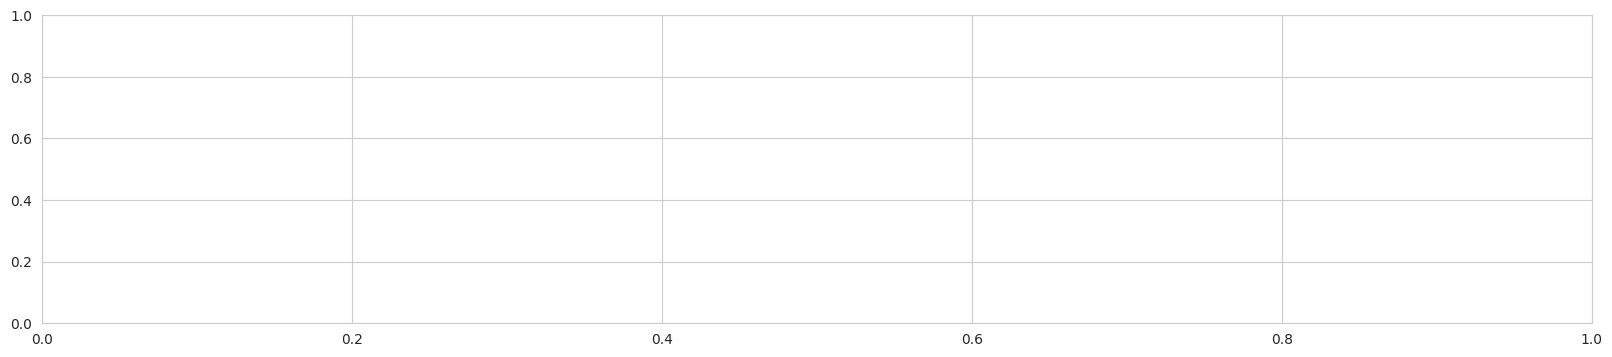

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot - assuming we want all chains in a row for this example
fig, axes = plt.subplots(1, nchains, figsize=(20, 4), sharey=True)

# Plot each chain's histogram for the 'A_eL' parameter
for i, ax in enumerate(axes):
    # Select the chain data for 'A_eL'
    chain_data = idata.posterior['A_eL'].sel(chain=i).values.flatten()

    # Generate a histogram on the axes
    ax.hist(chain_data, bins=25, histtype='stepfilled', color=colors[i % len(colors)], density=True)

    # Set titles and labels
    ax.set_title(f'Chain {i + 1}')
    ax.set_xlabel('A_eL')
    if i == 0:
        ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot - assuming we want all chains in a row for this example
fig, axes = plt.subplots(1, nchains, figsize=(20, 4), sharey=True)

# Plot each chain's histogram for the 'A_eT' parameter
for i, ax in enumerate(axes):
    # Select the chain data for 'A_eT'
    chain_data = idata.posterior['A_eT'].sel(chain=i).values.flatten()

    # Generate a histogram on the axes
    ax.hist(chain_data, bins=25, histtype='stepfilled', color=colors[i % len(colors)], density=True)

    # Set titles and labels
    ax.set_title(f'Chain {i + 1}')
    ax.set_xlabel('A_eT')
    if i == 0:
        ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot - assuming we want all chains in a row for this example
fig, axes = plt.subplots(1, nchains, figsize=(20, 4), sharey=True)

# Plot each chain's histogram for the 'A_piL' parameter
for i, ax in enumerate(axes):
    # Select the chain data for 'A_piL'
    chain_data = idata.posterior['A_piL'].sel(chain=i).values.flatten()

    # Generate a histogram on the axes
    ax.hist(chain_data, bins=25, histtype='stepfilled', color=colors[i % len(colors)], density=True)

    # Set titles and labels
    ax.set_title(f'Chain {i + 1}')
    ax.set_xlabel('A_piL')
    if i == 0:
        ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Convert the fit to an ArviZ InferenceData object
idata = az.from_pystan(posterior=asym_fit)

# Define a color palette for the chains
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Get the number of chains (assumes that 'chain' is a coordinate in the InferenceData)
nchains = len(idata.posterior.chain)

# Set up the plot - assuming we want all chains in a row for this example
fig, axes = plt.subplots(1, nchains, figsize=(20, 4), sharey=True)

# Plot each chain's histogram for the 'A_piT' parameter
for i, ax in enumerate(axes):
    # Select the chain data for 'A_piT'
    chain_data = idata.posterior['A_piT'].sel(chain=i).values.flatten()

    # Generate a histogram on the axes
    ax.hist(chain_data, bins=25, histtype='stepfilled', color=colors[i % len(colors)], density=True)

    # Set titles and labels
    ax.set_title(f'Chain {i + 1}')
    ax.set_xlabel('A_piT')
    if i == 0:
        ax.set_ylabel('Density')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()